# Traffic / pagesize analysis

In [1]:
import pandas

from parsoidbenchmark.analysis import *

def sizeof_fmt(num, suffix="B"):
    for unit in ["", "Ki", "Mi", "Gi", "Ti", "Pi", "Ei", "Zi"]:
        if abs(num) < 1024.0:
            return f"{num:3.1f}{unit}{suffix}"
        num /= 1024.0
    return f"{num:.1f}Yi{suffix}"


df = getDataframe("../data/output-metrics.csv", "../data/views.json")
df = getDiffs(df)
stats = getDiffsStats(df)

In [2]:
stripScenarios = set([stripped.split(".")[0] for _, stripped, _ in getDiffColumns()])
stripScenarios

{'full',
 'stripAboutIds',
 'stripDatamw',
 'stripParsoidIds',
 'stripRel',
 'stripSections',
 'stripSpanAbout',
 'stripSpanMWEntity',
 'stripTypeof'}

In [3]:
traffic = dict()
for scenario in stripScenarios:
    traffic[scenario] = {
        "originalParsoidTraffic": df[f"{scenario}.originalSize"].sum(),
        "legacyParserSizeTraffic": df[f"{scenario}.legacyParserSize"].sum(),
        "strippedParsoidTraffic": df[f"{scenario}.strippedSize"].sum(),
        "legacyParserTrafficDifference": df[f"{scenario}.strippedSize"].sum() - df[f"{scenario}.legacyParserSize"].sum(),
        "trafficHasIncreased": df[f"{scenario}.strippedSize"].sum() - df[f"{scenario}.legacyParserSize"].sum() > 0
    }

In [4]:
pandas.DataFrame(traffic).transpose()

originalParsoidTraffic legacyParserSizeTraffic  \
stripTypeof              151199187198306         105704337749299   
stripSections            151199187198306         105704337749299   
full                     151199187198306         105704337749299   
stripAboutIds            151199187198306         105704337749299   
stripRel                 151199187198306         105704337749299   
stripParsoidIds          151199187198306         105704337749299   
stripSpanMWEntity        151199187198306         105704337749299   
stripSpanAbout           151199187198306         105704337749299   
stripDatamw              151199187198306         105704337749299   

                  strippedParsoidTraffic legacyParserTrafficDifference  \
stripTypeof              149892507471104                44188169721805   
stripSections            150771712005824                45067374256525   
full                     105850186357439                  145848608140   
stripAboutIds            146282008680235                40577670930936   
stripRel                 149274994122686                43570656373387   
stripParsoidIds          133802838163239                28098500413940   
stripSpanMWEntity        150988485282842                45284147533543   
stripSpanAbout           151116550641381                45412212892082   
stripDatamw              131414935952405                25710598203106   

                  trafficHasIncreased  
stripTypeof                      True  
stripSections                    True  
full                             True  
stripAboutIds                    True  
stripRel                         True  
stripParsoidIds                  True  
stripSpanMWEntity                True  
stripSpanAbout                   True  
stripDatamw                      True

In [5]:
traffic = pandas.DataFrame(traffic)
traffic = traffic.drop(["trafficHasIncreased"])

In [6]:
traffic.transpose().plot(kind="bar")


<AxesSubplot:>

In [7]:
def getBinsTraffic(diffRatio, stripped, original):
    bins = pandas.cut(df[diffRatio], bins=10)
    data = df.groupby(bins)[[stripped]].sum()
    return data    

In [8]:
def visualizeBins():
    for diffRatio, stripped, original in getDiffColumns():
        x = getBinsTraffic(diffRatio, stripped, original)

        if (diffRatio == "stripFullLegacy"):
            continue

        p = sns.barplot(x=x.index, y=x[stripped])
        p.set(xlabel=f"Size reduction ratio (%) - bins - {diffRatio}")
        p.set(ylabel="Total traffic - bytes")
        plt.xticks(rotation=45)
        plt.show()

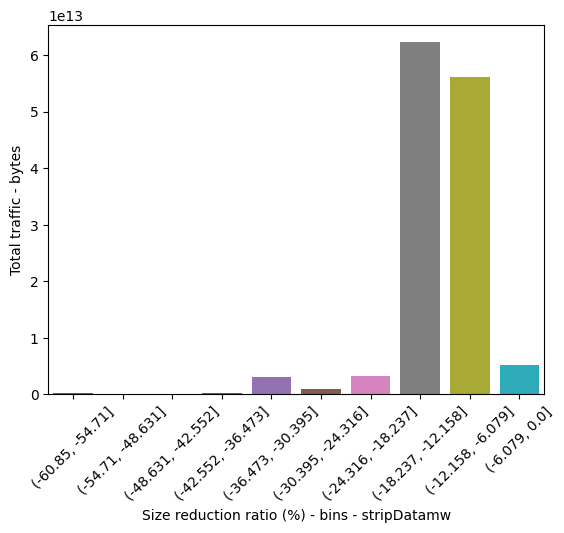

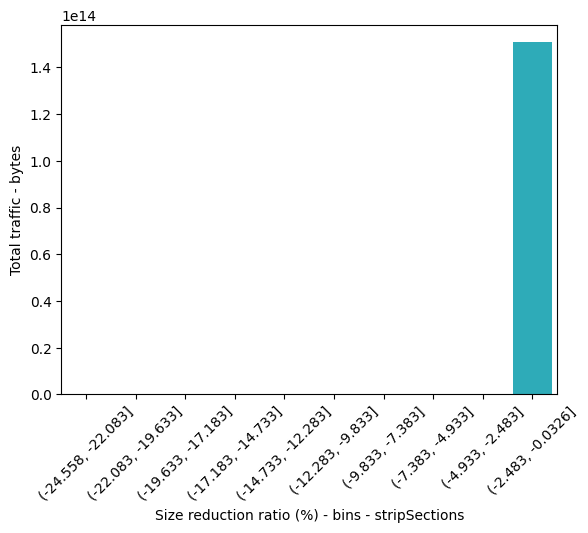

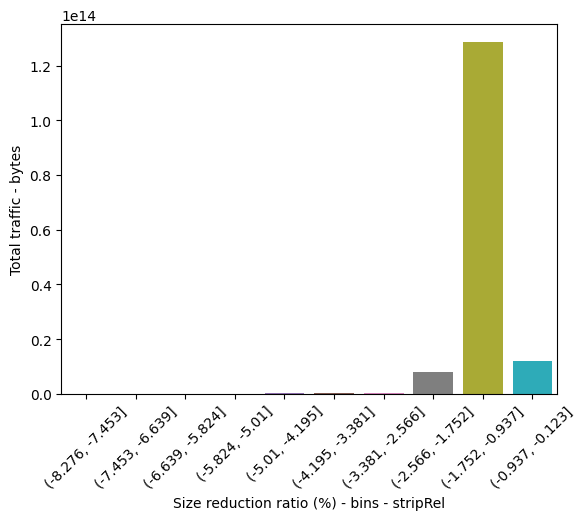

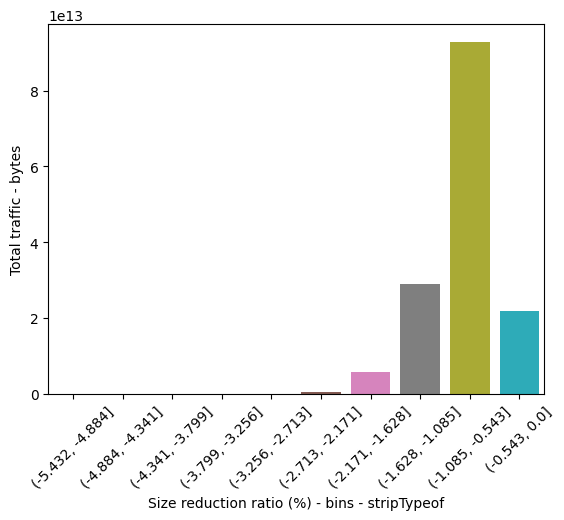

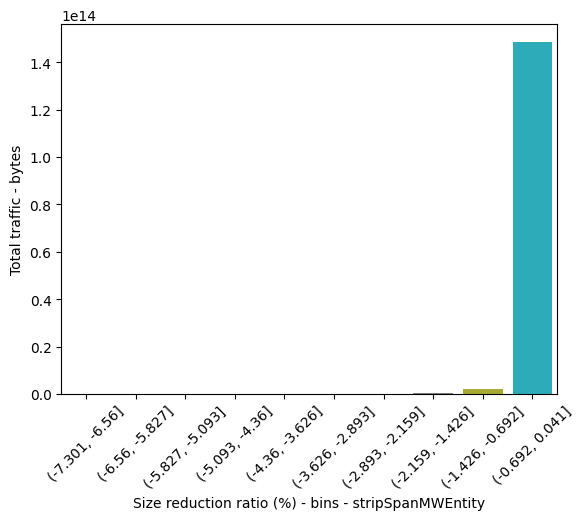

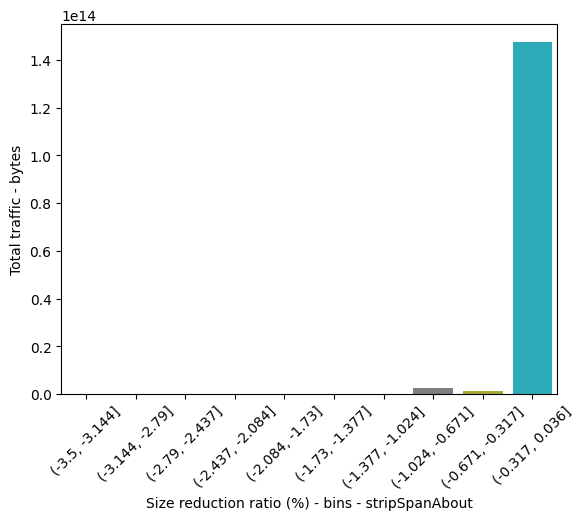

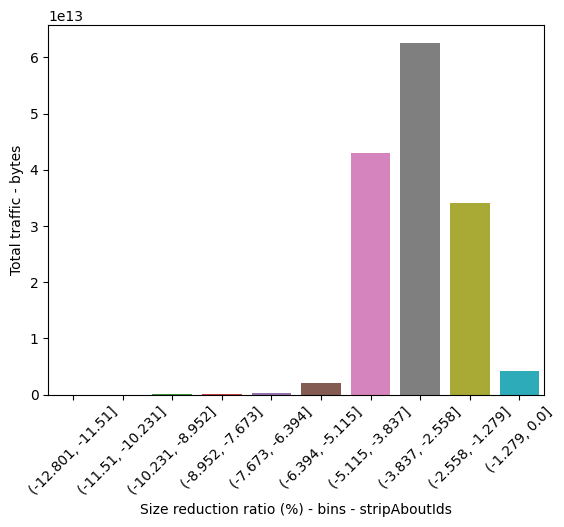

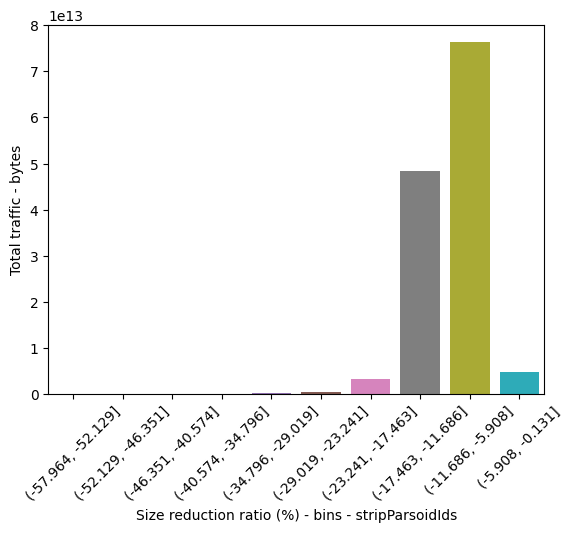

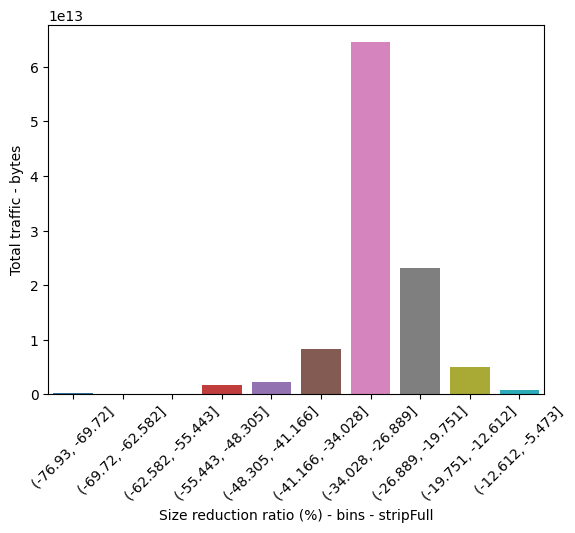

In [9]:
visualizeBins()